In [90]:
import numpy as np
np.random.seed(4)
#gaussian distribution sampler: normal(mean=0.0, variance_sqrt=1.0, size=None) s = np.random.normal(0,1)
#teacher model
#randomly generate z=(x,y) with x evenly sampled from (0,10) and y = 1.5 x + 5, a random noise is added. A total of N samples are drawn.
#dimension of x: d
d = 10
#number of training samples
N = 5
#dimension of hypothesis space
p = 10

#point-wise activate function f:tanh
#variance of random noise added to y
sigma = 0.1
#samples X(N*d)
X = np.random.normal(0,1,(N,d))
#random feature matrix F(d*p)
F = np.random.normal(0,1,(d,p))
#teacher parameter w(p) with lambda = ? until each dim of Y~1e0
lambda_ = 0.0001
#w_0 = np.random.normal(0,sigma/np.sqrt(lambda_*N),p)
w_0 = np.random.normal(0,1,p)
#X after the random feature matrix
X_rf = np.tanh(X.dot(F)/np.sqrt(d))
Y_pure = X_rf.dot(w_0)
Y = Y_pure + np.random.normal(0,sigma,N)
print(Y_pure)
print(Y)

[-0.67693936 -0.33076834  2.10363226  1.06983043  1.54022534]
[-0.71705705 -0.2412579   1.95404702  1.00029074  1.5282842 ]


In [91]:
#empirical risk
#L_S(w)
def L_S(w):
    diff = Y-X_rf.dot(w)
    Nloss = diff.dot(diff)
    return Nloss/N

def grad_L_S(w):
    return -2/N*X_rf.T.dot(Y-X_rf.dot(w))

grad_L_S(w_0+0.1)#when N is small, diffusion.

array([ 0.31910108,  0.23417426,  0.1648139 , -0.04817985,  0.19865997,
       -0.18375426,  0.24910307,  0.10514435, -0.01561705,  0.01840122])

In [92]:
#minus log distribution: f
#prar beta(also change h if change this)
beta = 1000
#para sigma_q, can be set according to N.
sigma_q = 1
def f(w): 
    return beta*L_S(w)+(1/2/sigma_q**2)*(w.dot(w))

def grad_f(w):
    grad = beta*grad_L_S(w)+1/sigma_q**2*w
    return grad

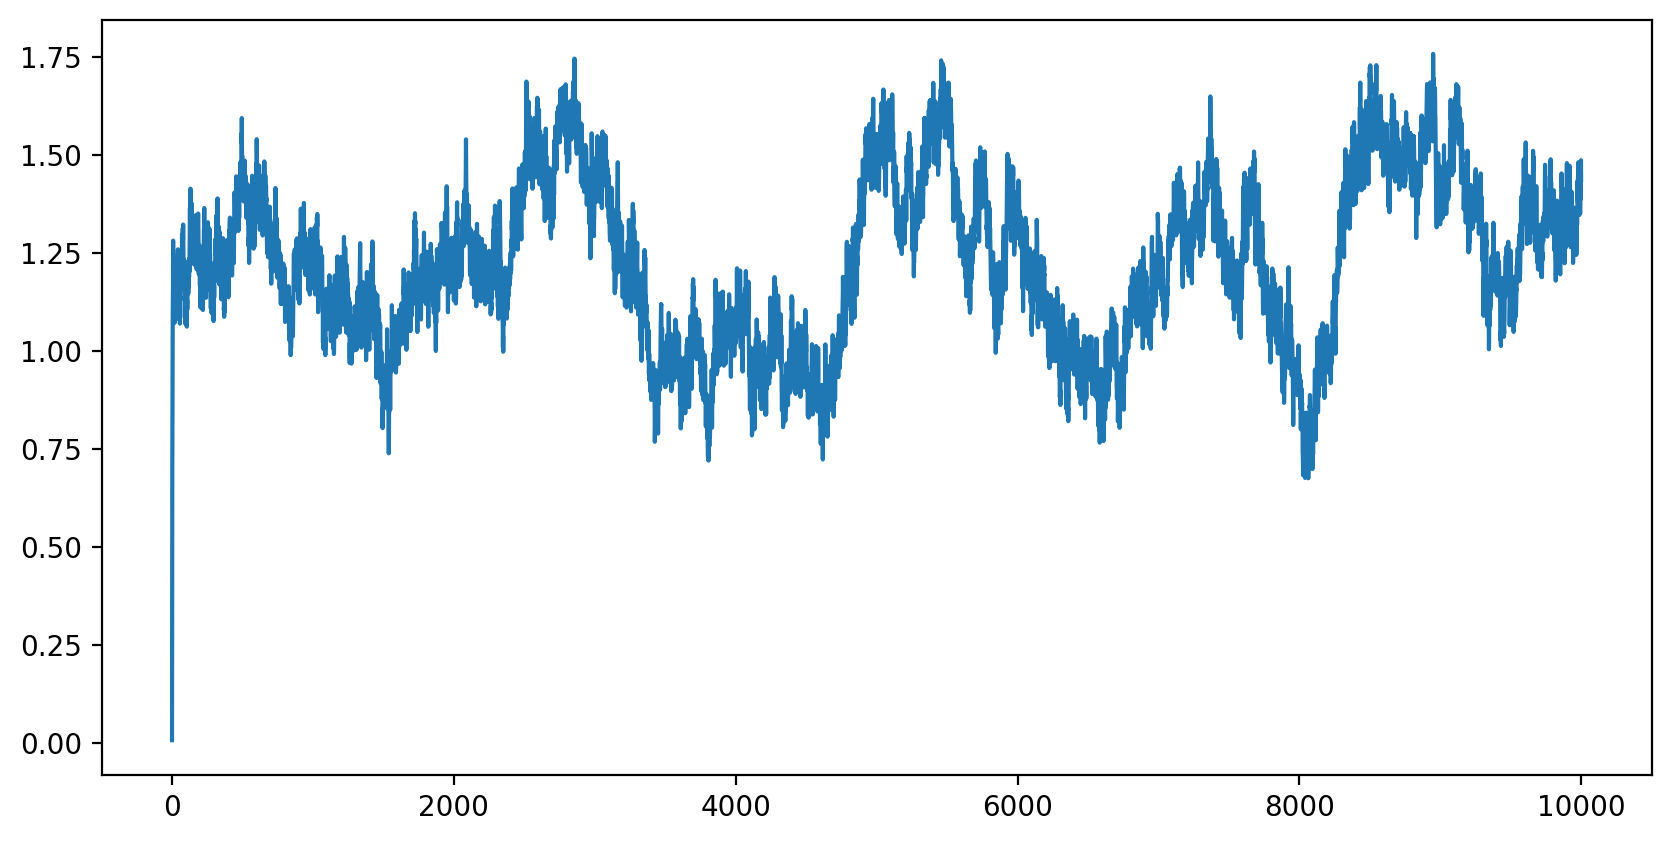

[ 0.2526396  -0.41996925 -0.34000275  0.17188903  1.46139092 -0.97597856
  0.30798764  0.05312899 -1.14402812  0.63869927]
[ 0.11492218  0.21237029 -0.50838023  1.00598199  1.53179086 -0.5936018
  0.76410567 -0.32956654 -0.17111499  0.18428476]
2.2995569959706494
2.18705683616463


7.571035232746077

In [93]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize = (10,5), dpi = 200)
x = []
y = []

#MCMC
#stepsize h(h*beta=0.01)
h = 0.00001
w = np.zeros(p)
for i in range(1000000):
    grad_f_w = grad_f(w)
    proposal_state = w-h*grad_f_w+np.sqrt(2*h)*np.random.normal(0,1,p)
    reject_thresh = min(1,np.exp(f(w)-f(proposal_state)+(1/4/h)*(np.linalg.norm(proposal_state-w+h*grad_f_w)**2-np.linalg.norm(w-proposal_state+h*grad_f(proposal_state))**2)))
    U = np.random.rand(1)
    if U <= reject_thresh:
        w = proposal_state
    if i%100 == 0:
        x.append(int(i/100))
        y.append(w[4])

x = np.array(x)
y = np.array(y)
ax1.plot(x,y)
plt.savefig('(5,10,0.1).png')
plt.show()

#print(w)
#print(w_0)
diviant = np.linalg.norm((w-w_0)/np.average(w_0))

(w-w_0)/np.average(w_0)

print(w[0:20])
print(w_0[0:20])
print(np.linalg.norm(w))
print(np.linalg.norm(w_0))
diviant